## IPL DATA ANALYSIS

### Operations included 

- perform munging on the dataset
- find who won IPL, the maximum times
- find orange cap, purple cap winner for each season
- find the performance of the captains based on: 
    - number of times a team got into top 4
    - total number of matches won/total matches played
    - captain's individual performance
    - number of times captain has won the trophy
- find out who's the hard hitter in the past 10 years (give a list of top 3 hard hitters)
- compare and contrast the performance of RCB over any team of your choice in the following criteria
    - number of sixes 
    - number of fours
    - number of half centuries
    - number of centuries
    - number of hattricks
    - consistent running between the wickets.
- compare and contrast any 3 bowlers, batsmen and WKs belonging to 3 different teams and analyse their strength and weaknesses.

Data munging, also known as data wrangling, is the process of cleaning, transforming, and preparing raw data into a structured format that is suitable for analysis. This essential step in data preprocessing involves tasks such as handling missing values, removing duplicates, standardizing data types, and reformatting data to ensure consistency and accuracy. Data munging aims to make data more accessible and suitable for analysis, reducing errors and inconsistencies that can hinder meaningful insights. It is a crucial part of the data preparation pipeline in data science and analytics, helping to ensure that the data is reliable and ready for various data-driven tasks, such as modeling and visualization. 

We have data munging at different steps of the case study so as to facilate the analysis.

In [4]:
import pandas as pd
import numpy as np

In [5]:
ball=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
match=pd.read_csv('IPL Matches 2008-2020.csv')
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
id                 816 non-null int64
city               803 non-null object
date               816 non-null object
player_of_match    812 non-null object
venue              816 non-null object
neutral_venue      816 non-null int64
team1              816 non-null object
team2              816 non-null object
toss_winner        816 non-null object
toss_decision      816 non-null object
winner             812 non-null object
result             812 non-null object
result_margin      799 non-null float64
eliminator         812 non-null object
method             19 non-null object
umpire1            816 non-null object
umpire2            816 non-null object
dtypes: float64(1), int64(2), object(14)
memory usage: 108.5+ KB


In [8]:
season= pd.DatetimeIndex(match['date']).year
match['season']=season
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


#### - Which team won the maximum titles in IPL

In [9]:
winner=[]
for i in range(2008,2021):
    a=match[match.season==i]
    b=a.iloc[-1]['winner']
    winner.append(b)

c=pd.DataFrame({'winner':winner})

# Use the value_counts() method to count occurrences
team_counts = c['winner'].value_counts()

# Get the most common team
max_team = team_counts.idxmax()

print(f"{max_team} has won {team_counts.max()} titles during 2008-2020, which the most number of IPL titles won by any team")

Mumbai Indians has won 5 titles during 2008-2020, which the most number of IPL titles won by any team


#### - Display the list of orange cap and purple cap winner for each season.

In [10]:
#ORANGE CAP LIST
ipl = pd.merge(match,ball,on='id')
runs=ipl.pivot_table(index=['season','batsman'],values=['batsman_runs'],aggfunc='sum')
runs=runs.reset_index()

# Create a pivot table to find the maximum runs for each season
pivot_table = runs.pivot_table(index='season', values='batsman_runs', aggfunc='max')

# Merge the pivot table with the original DataFrame to get the corresponding batsman
result = pd.merge(runs, pivot_table, on=['season', 'batsman_runs'])

print("\nORANGE CAP LIST FOR THE IPL SEASON 2008-2020\n")
print(result[['season','batsman','batsman_runs']].to_string(index=False))
print()

#PURPLE CAP LIST
wickets=ipl.pivot_table(index=['season','bowler'],values=['is_wicket'],aggfunc='sum')
wickets=wickets.reset_index()

# Create a pivot table to find the maximum runs for each season
pivot_table = wickets.pivot_table(index='season', values='is_wicket', aggfunc='max')

# Merge the pivot table with the original DataFrame to get the corresponding batsman
result = pd.merge(wickets, pivot_table, on=['season', 'is_wicket'])

result = result.rename(columns={'is_wicket': 'wickets'})


print("\nPURPLE CAP LIST FOR THE IPL SEASON 2008-2020\n")
print(result[['season','bowler','wickets']].to_string(index=False))
print()


ORANGE CAP LIST FOR THE IPL SEASON 2008-2020

 season        batsman  batsman_runs
   2008       SE Marsh           616
   2009      ML Hayden           572
   2010   SR Tendulkar           618
   2011       CH Gayle           608
   2012       CH Gayle           733
   2013     MEK Hussey           733
   2014     RV Uthappa           660
   2015      DA Warner           562
   2016        V Kohli           973
   2017      DA Warner           641
   2018  KS Williamson           735
   2019      DA Warner           692
   2020       KL Rahul           670


PURPLE CAP LIST FOR THE IPL SEASON 2008-2020

 season         bowler  wickets
   2008  Sohail Tanvir       24
   2009       RP Singh       26
   2010        PP Ojha       22
   2011     SL Malinga       30
   2012       M Morkel       30
   2013       DJ Bravo       34
   2014      MM Sharma       26
   2015       DJ Bravo       28
   2016        B Kumar       24
   2017        B Kumar       28
   2018         AJ Tye       28
   

In [11]:
ipl.iloc[1:10]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [12]:
#task: find out who's the hard hitter in the past 10 years (give a list of top 3 hard hitters).
four=ipl[ipl.batsman_runs==4]
six=ipl[ipl.batsman_runs==6]

#aggregating the players data based on 4s, 6s, runs and balls
four_pv=four.pivot_table(index=['batsman'],values='batsman_runs',aggfunc='count')
four_pv=four_pv.rename(columns={'batsman_runs':'fours'})

six_pv=six.pivot_table(index=['batsman'],values='batsman_runs',aggfunc='count')
six_pv=six_pv.rename(columns={'batsman_runs':'six'})

runs_pv=ipl.pivot_table(index=['batsman'],values='batsman_runs',aggfunc='sum')
runs_pv=runs_pv.rename(columns={'batsman_runs':'runs'})

balls_pv=ipl.pivot_table(index=['batsman'],values='batsman_runs',aggfunc='count')
balls_pv=balls_pv.rename(columns={'batsman_runs':'balls'})

# Merge the DataFrames on the 'batsman' column
hitter = pd.merge(four_pv, six_pv, on='batsman')
hitter = pd.merge(hitter, runs_pv, on='batsman')
hitter = pd.merge(hitter, balls_pv, on='batsman')

#calculating the economy rate
hitter['economy_rate']=round((hitter['runs']/hitter['balls'])*100,2)

Criteria for a player to qualify for the category :-
- played minimum 100 balls
- hit more than 50 sixes
- hit more than 50 fours
- scored more than 500 runs

In [13]:
print("\n IPL most HARD HITING PLAYER")

#taking players played minimum 200 balls, sorting the data based on economy rate and selecting the top 3 players
hitter[(hitter.balls>=300) &(hitter.six>=50) &(hitter.fours>=50) &(hitter.runs>=500)].sort_values(by='economy_rate',ascending=False).iloc[0:3]


 IPL most HARD HITING PLAYER


,fours,six,runs,balls,economy_rate
batsman,,,,,
AD Russell,105,129,1517,882,172.00
SP Narine,103,52,892,573,155.67
HH Pandya,86,93,1349,897,150.39


#### - compare and contrast the performance of RCB over any team of your choice in the following criteria


- number of sixes 
- number of fours
- number of half centuries
- number of centuries
- number of hattricks
- consistent running between the wickets.

In [14]:
ipl=ipl[(ipl.season !=2016)&(ipl.season !=2017)] #excluding 2016 and 2017 season since CSK was not the part of those seasons.

In [15]:
#RCB

#created 2 dataset based on CSK's batting and bowling
RCB_batting=ipl[ipl.batting_team=='Royal Challengers Bangalore']
RCB_bowling=ipl[ipl.bowling_team=='Royal Challengers Bangalore']

#further spliting the batting dataset based on boundaries and runs scored by running
rcb_4=RCB_batting[RCB_batting.batsman_runs==4]
rcb_6=RCB_batting[RCB_batting.batsman_runs==6]
rcb_running=RCB_batting[(RCB_batting.batsman_runs==1)|(RCB_batting.batsman_runs==2)|(RCB_batting.batsman_runs==3)]

#Calculating total 4s
rcb_fours=rcb_4.groupby('batting_team')['batsman_runs'].count().reset_index()
rcb_fours=rcb_fours.rename(columns={'batting_team':'team','batsman_runs':'fours'})

#Calculating total 6s
rcb_six=rcb_6.groupby('batting_team')['batsman_runs'].count().reset_index()
rcb_six=rcb_six.rename(columns={'batting_team':'team','batsman_runs':'sixes'})

#calculating half centuries
hf_rcb=RCB_batting.pivot_table(index=['id','batsman'],values='batsman_runs',aggfunc='sum')
hf_rcb_df = pd.DataFrame({'team': ['Royal Challengers Bangalore'], 'half_centuries': [len(hf_rcb[(hf_rcb.batsman_runs>=50)&(hf_rcb.batsman_runs<=99)])]})

#calculating centuries
cen_rcb=RCB_batting.pivot_table(index=['id','batsman'],values='batsman_runs',aggfunc='sum')
cen_rcb_df = pd.DataFrame({'team': ['Royal Challengers Bangalore'], 'centuries': [len(hf_rcb[(hf_rcb.batsman_runs>=100)])]})

#calculating Running between wickets
running_rcb=rcb_running.pivot_table(index=['batting_team'],values='batsman_runs',aggfunc='sum')
total_runs_rcb=RCB_batting.pivot_table(index=['batting_team'],values='batsman_runs',aggfunc='sum')
running_df_rcb=pd.DataFrame({'team': ['Royal Challengers Bangalore'], 'Running_between_the_wickets_efficiency': round((running_rcb.batsman_runs/total_runs_rcb.batsman_runs)*100,2)})

In [16]:
##Merging all the datasets of RCB

RCB = pd.merge(rcb_fours,rcb_six, on='team')
RCB = pd.merge(RCB, hf_rcb_df, on='team')
RCB = pd.merge(RCB, cen_rcb_df, on='team')
RCB = pd.merge(RCB, running_df_rcb, on='team')
 

In [17]:
#CSK

#created 2 dataset based on CSK's batting and bowling
CSK_batting=ipl[ipl.batting_team=='Chennai Super Kings']
CSK_bowling=ipl[ipl.bowling_team=='Chennai Super Kings']

#further spliting the batting dataset based on boundaries and runs scored by running
csk_4=CSK_batting[CSK_batting.batsman_runs==4]
csk_6=CSK_batting[CSK_batting.batsman_runs==6]
csk_running=CSK_batting[(CSK_batting.batsman_runs==1)|(CSK_batting.batsman_runs==2)|(CSK_batting.batsman_runs==3)]

#Calculating total 4s
csk_fours=csk_4.groupby('batting_team')['batsman_runs'].count().reset_index()
csk_fours=csk_fours.rename(columns={'batting_team':'team','batsman_runs':'fours'})

#Calculating total 6s
csk_six=csk_6.groupby('batting_team')['batsman_runs'].count().reset_index()
csk_six=csk_six.rename(columns={'batting_team':'team','batsman_runs':'sixes'})

#calculating half centuries
hf_csk=CSK_batting.pivot_table(index=['id','batsman'],values='batsman_runs',aggfunc='sum')
hf_csk_df=pd.DataFrame({'team': ['Chennai Super Kings'], 'half_centuries': [len(hf_csk[(hf_csk.batsman_runs>=50)&(hf_csk.batsman_runs<=99)])]})

#calculating centuries
cen_csk=CSK_batting.pivot_table(index=['id','batsman'],values='batsman_runs',aggfunc='sum')
cen_csk_df=pd.DataFrame({'team': ['Chennai Super Kings'], 'centuries': [len(hf_csk[(hf_csk.batsman_runs>=100)])]})

#calculating Running between wickets
running_csk=csk_running.pivot_table(index=['batting_team'],values='batsman_runs',aggfunc='sum')
total_runs_csk=CSK_batting.pivot_table(index=['batting_team'],values='batsman_runs',aggfunc='sum')
running_csk_df=pd.DataFrame({'team': ['Chennai Super Kings'], 'Running_between_the_wickets_efficiency': round((running_csk.batsman_runs/total_runs_csk.batsman_runs)*100,2)})

In [18]:
##Merging all the datasets of CSK

CSK = pd.merge(csk_fours,csk_six, on='team')
CSK = pd.merge(CSK, hf_csk_df, on='team')
CSK = pd.merge(CSK, cen_csk_df, on='team')
CSK = pd.merge(CSK, running_csk_df, on='team')
 

In [19]:
RCB

,team,fours,sixes,half_centuries,centuries,Running_between_the_wickets_efficiency
0,Royal Challengers Bangalore,2159,980,125,8,39.71


In [20]:
CSK

,team,fours,sixes,half_centuries,centuries,Running_between_the_wickets_efficiency
0,Chennai Super Kings,2374,1050,147,8,41.3


In [21]:
import matplotlib.pyplot as plt

# Set parameters and labels
params = ["fours", "sixes", "half_centuries", "centuries", "Running_between_the_wickets_efficiency"]
labels = ["Fours", "Sixes", "Half Centuries", "Centuries", "Running Efficiency"]

# Create subplots for each parameter
fig, axs = plt.subplots(1, len(params), figsize=(18, 6))

for i, param in enumerate(params):
    axs[i].bar(RCB["team"], RCB[param], label="RCB", color='r', alpha=0.6, width=0.4)
    axs[i].bar(CSK["team"], CSK[param], label="CSK", color='y', alpha=0.6, width=0.4)
    axs[i].set_xlabel("Team")
    axs[i].set_ylabel(labels[i])
    axs[i].set_title(labels[i])
    axs[i].legend()
    
    

plt.suptitle("Comparison of Royal Challenger Bangalore and Chennai Super Kings", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust subplot layout
plt.show()


<Figure size 1800x600 with 5 Axes>

We can infer that CSK is leading over RCB in terms of their total number of fours, sixes, centuries, and overall running efficiency. However, when it comes to comparing the total number of centuries, both teams are on an equal footing.

#### - Compare and contrast any 3 bowlers, batsmen and WKs belonging to 3 different teams and analyse their strength and weaknesses.

In [22]:
ipl = pd.merge(match,ball,on='id')

In [23]:
#3 Batsmen
VK=ipl[ipl.batsman=='V Kohli']
RS=ipl[ipl.batsman=='RG Sharma']
SR=ipl[ipl.batsman=='SK Raina']

vk=VK.pivot_table(index='season',values='batsman_runs',aggfunc='sum')
vk=vk.rename(columns={'batsman_runs':'Virat Kohli'})
vk=vk.reset_index()

rs=RS.pivot_table(index='season',values='batsman_runs',aggfunc='sum')
rs=rs.rename(columns={'batsman_runs':'Rohit Sharma'})
rs=rs.reset_index()

sr=SR.pivot_table(index='season',values='batsman_runs',aggfunc='sum')
sr=sr.rename(columns={'batsman_runs':'Suresh Raina'})
sr=sr.reset_index()


bat=pd.merge(vk,rs,on='season')
bat=pd.merge(bat,sr,on='season')

In [24]:
bat

,season,Virat Kohli,Rohit Sharma,Suresh Raina
0,2008,165,404,421
1,2009,246,362,434
2,2010,307,404,520
3,2011,557,372,438
4,2012,364,433,441
5,2013,634,538,548
6,2014,359,390,523
7,2015,505,482,374
8,2016,973,489,399
9,2017,308,333,442


<function matplotlib.pyplot.show(*args, **kw)>

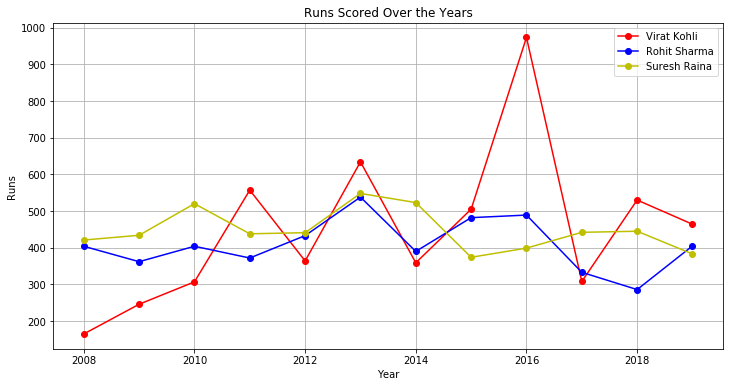

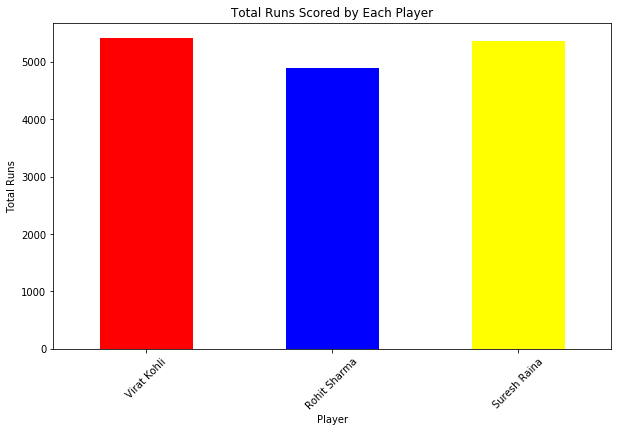

In [25]:
# Summary statistics
summary = bat.describe()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(bat['season'], bat['Virat Kohli'], marker='o', label='Virat Kohli',color='r')
plt.plot(bat['season'], bat['Rohit Sharma'], marker='o', label='Rohit Sharma',color='b')
plt.plot(bat['season'], bat['Suresh Raina'], marker='o', label='Suresh Raina',color='y')
plt.title('Runs Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)

# Bar plot for the total runs in each season
total_runs = bat[['Virat Kohli','Rohit Sharma','Suresh Raina']].sum()
plt.figure(figsize=(10, 6))
total_runs.plot(kind='bar', color=['red', 'blue', 'yellow'])
plt.title('Total Runs Scored by Each Player')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)

plt.show

The very first inference from the line plot is the extraordinary and exceptional performance of Virat Kohli in 2016, scoring around 950 runs. Virat Kohli had an ordinary IPL seasons during its initial phase, post which he worked on his fitness and finally showed his potential in 2016. In 2017, he had a pretty ordinary season but recovered well in the next two seasons, thereafter.

Rohit Sharma and Suresh Raina had a pretty decent and similar opening season of IPL. Going forward, 2009 to 2014 phase of the event was majorly dominated by the left handed southpaw. Rohit Sharma geared up in 2015 and 2016 season but again underperformed in the next seasons.

In [26]:
#3 Bowlers
HS=ipl[(ipl.bowler=='Harbhajan Singh') &((ipl.dismissal_kind != 'run out') | (ipl.dismissal_kind !='retired hurt'))]
RA=ipl[(ipl.bowler=='R Ashwin') &((ipl.dismissal_kind != 'run out') | (ipl.dismissal_kind !='retired hurt'))]
RJ=ipl[(ipl.bowler=='RA Jadeja') &((ipl.dismissal_kind != 'run out') | (ipl.dismissal_kind !='retired hurt'))]

hs=HS.pivot_table(index='season',values='is_wicket',aggfunc='sum')
hs=hs.rename(columns={'is_wicket':'Harbhajan Singh'})
hs=hs.reset_index()

ra=RA.pivot_table(index='season',values='is_wicket',aggfunc='sum')
ra=ra.rename(columns={'is_wicket':'Ravichandran Aswhin'})
ra=ra.reset_index()


rj=RJ.pivot_table(index='season',values='is_wicket',aggfunc='sum')
rj=rj.rename(columns={'is_wicket':'Ravindra Jadeja'})
rj=rj.reset_index()


bowl=pd.merge(hs,ra,on='season')
bowl=pd.merge(bowl,rj,on='season')

   season  Harbhajan Singh  Ravichandran Aswhin  Ravindra Jadeja
0    2009               13                    2                6
1    2011               16                   21                9
2    2012                6                   19               12
3    2013               25                   16               15
4    2014               14                   17               20
5    2015               19                   10               12
6    2016                9                   11                9
7    2018                7                   11               12
8    2019               18                   17               15


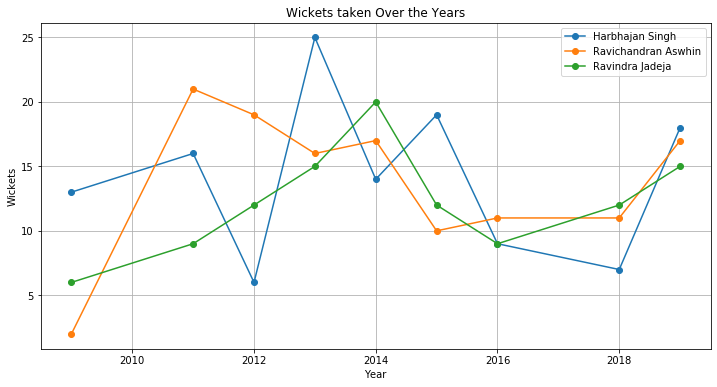

In [27]:
# Summary statistics
summary = bowl.describe()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(bowl['season'], bowl['Harbhajan Singh'], marker='o', label='Harbhajan Singh')
plt.plot(bowl['season'], bowl['Ravichandran Aswhin'], marker='o', label='Ravichandran Aswhin')
plt.plot(bowl['season'], bowl['Ravindra Jadeja'], marker='o', label='Ravindra Jadeja')
plt.title('Wickets taken Over the Years')
plt.xlabel('Year')
plt.ylabel('Wickets')
plt.legend()
plt.grid(True)
plt.show

print(bowl)

This graph shows the ups and downs faced by all the 3 ace spinners in their IPL journey. Harbhajan Singh started his IPL journey pretty well, leading Mumbai Indians in the absence of Sachin Tendulkar, and taking 13 wickets.But with the 3rd season, his performance dropped drastically due to fitness reasons. He made a great comeback in the very next season with 25 wickets. Going forward, his performance was not up to the mark, except some. Ravi Ashwin improved tremendously in the 1st phase of his IPL journey, after which his average performance started to overshadow his exceptional talent. Ravindra Jadeja on the other hand, improved his performance season by season and had his better season ever in 2014, post which he also faced some hiccups in his journey. Nevertheless, he has always been an invaluable asset in the armory of MS Dhoni. 

In [28]:
#3 WKs, only considering 2018 season 
MSD=ipl[(ipl.bowling_team=='Chennai Super Kings') & ((ipl.dismissal_kind=='caught')|(ipl.dismissal_kind=='stumped')|(ipl.dismissal_kind=='run out')) 
       &(ipl.fielder=='MS Dhoni') & (ipl.season==2018) ]
JB=ipl[(ipl.bowling_team=='Rajasthan Royals') & ((ipl.dismissal_kind=='caught')|(ipl.dismissal_kind=='stumped')|(ipl.dismissal_kind=='run out')) 
       &(ipl.fielder=='JC Buttler') & (ipl.season==2018) ]
RP=ipl[(ipl.bowling_team=='Delhi Daredevils') & ((ipl.dismissal_kind=='caught')|(ipl.dismissal_kind=='stumped')|(ipl.dismissal_kind=='run out')) 
       &(ipl.fielder=='RR Pant') & (ipl.season==2018) ]

msd=MSD.pivot_table(index='dismissal_kind',values='is_wicket',aggfunc='sum',fill_value=0)
msd=msd.rename(columns={'is_wicket':'MS Dhoni'})
msd=msd.reset_index()

jb=JB.pivot_table(index='dismissal_kind',values='is_wicket',aggfunc='sum',fill_value=0)
jb=jb.rename(columns={'is_wicket':'JC Buttler'})
jb=jb.reset_index()


rp=RP.pivot_table(index='dismissal_kind',values='is_wicket',aggfunc='sum',fill_value=0)
rp=rp.rename(columns={'is_wicket':'Rishabh Pant'})
rp=rp.reset_index()


wk=pd.merge(msd,jb,on='dismissal_kind')
wk=pd.merge(wk,rp,on='dismissal_kind')

In [29]:
wk

,dismissal_kind,MS Dhoni,JC Buttler,Rishabh Pant
0,caught,11,9,4
1,stumped,3,1,2


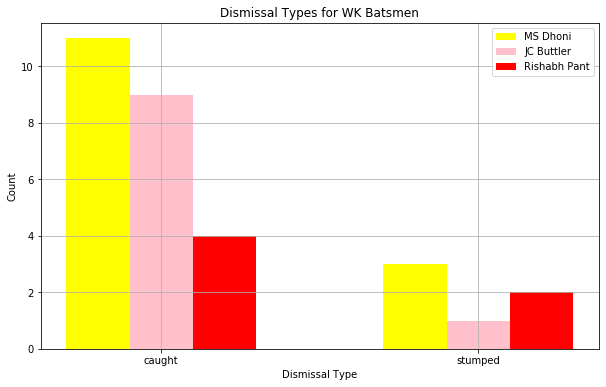

  dismissal_kind  MS Dhoni  JC Buttler  Rishabh Pant
0         caught        11           9             4
1        stumped         3           1             2


In [30]:
# Extract dismissal types and player names
dismissal_types = wk['dismissal_kind']
players = ['MS Dhoni', 'JC Buttler', 'Rishabh Pant']

# Define colors for players
colors = {'MS Dhoni': 'yellow', 'JC Buttler': 'pink', 'Rishabh Pant': 'red'}

# Create a grouped bar plot with custom colors
bar_width = 0.2
index = range(len(dismissal_types))

plt.figure(figsize=(10, 6))

for i, player in enumerate(players):
    plt.bar([x + i * bar_width for x in index], wk[player], bar_width, label=player, color=colors[player])

plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.title('Dismissal Types for WK Batsmen')
plt.xticks([x + bar_width for x in index], dismissal_types)
plt.legend()
plt.grid(True)

# Show the grouped bar plot
plt.show()

# Print the DataFrame
print(wk)

We can see that among the 3 wicket keepers, MS dhoni have the highest number of catches and stumping, which shows his extra-ordinary and unorthodox skills, among the wicket keepers in IPL. Rishabh Pant is far behind both his senior counterparts in terms of catching, which might highlight is weakness behind the wicket, though we don't have any substantial data to support this finding. JC Buttler only completed only 1 stumping in 2018 season.

#### - find the performance of the captains based on:
- number of times a team got into top 4
- total number of matches won/total matches played
- captain's individual performance
- number of times captain has won the trophy

In [31]:
#Data munging
match['winner']=match['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
match['team1']=match['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
match['team2']=match['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')


In [32]:
a=match.groupby('winner').agg({'winner': 'count'})
a=a.rename(columns={'winner':'count'})
a=a.reset_index()
a=a.rename(columns={'winner':'Team'})
a=a.sort_values(by='count',ascending=False)
a

,Team,count
8,Mumbai Indians,120
0,Chennai Super Kings,106
7,Kolkata Knight Riders,99
12,Royal Challengers Bangalore,91
5,Kings XI Punjab,88
10,Rajasthan Royals,81
3,Delhi Daredevils,67
13,Sunrisers Hyderabad,66
1,Deccan Chargers,29
2,Delhi Capitals,19


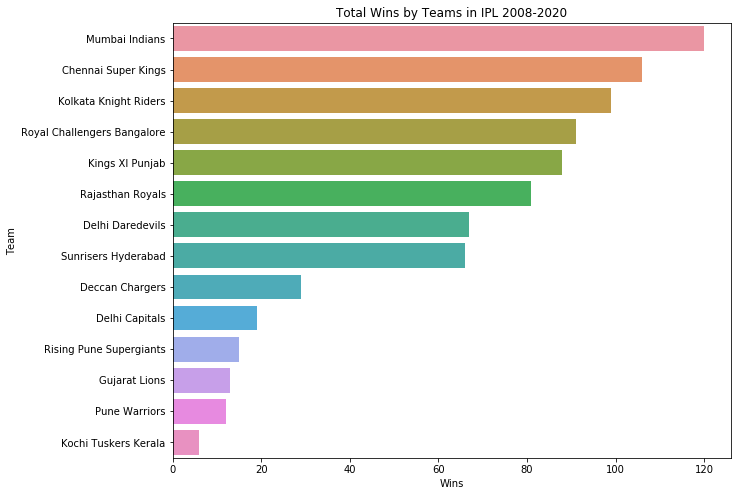

In [33]:
import seaborn as sns


plt.figure(figsize=(10,8))
sns.barplot(y=a['Team'],x=a['count'],orient='h')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Total Wins by Teams in IPL 2008-2020')
plt.show()


We can see that Mumbai Indians have the highest number of wins (120) wherease Chennai Super Kings stand in the second position with 108 wins (except for 2016 and 2017 season due to the team's non-participation).

In [34]:
#total matches
b=match.groupby('team1').agg({'id': 'count'})
c=match.groupby('team2').agg({'id': 'count'})
d=pd.concat([b,c],axis=0)
d=d.reset_index()
d=d.rename(columns={'index':'Team','id':'matches'})
summ=d.groupby('Team').agg({'matches':'sum'})
summ

#total wins
win=pd.merge(summ,a,on='Team')
win['Win%']=round(win['count']/win['matches']*100,2)
win=win.sort_values(by='Win%')
win

,Team,matches,count,Win%
9,Pune Warriors,46,12,26.09
1,Deccan Chargers,75,29,38.67
3,Delhi Daredevils,161,67,41.61
6,Kochi Tuskers Kerala,14,6,42.86
4,Gujarat Lions,30,13,43.33
5,Kings XI Punjab,190,88,46.32
12,Royal Challengers Bangalore,195,91,46.67
11,Rising Pune Supergiants,30,15,50.00
10,Rajasthan Royals,161,81,50.31
7,Kolkata Knight Riders,192,99,51.56


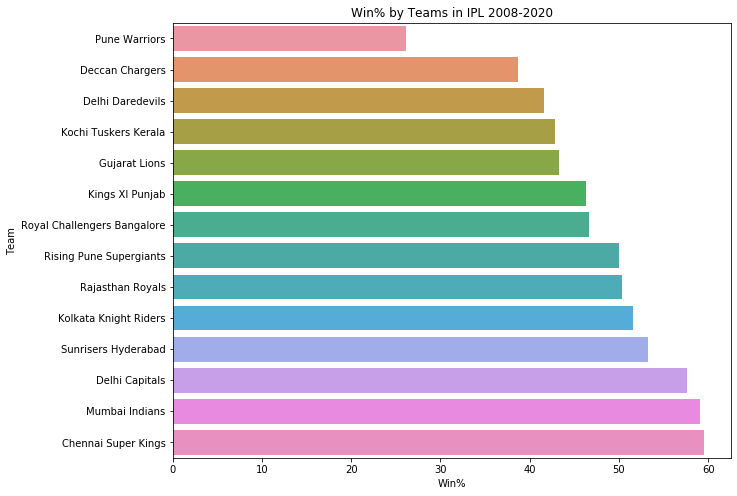

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(y=win['Team'],x=win['Win%'],orient='h')
plt.xlabel('Win%')
plt.ylabel('Team')
plt.title('Win% by Teams in IPL 2008-2020')
plt.show()


Chennai Super Kings have the highest win percent whereas Pune Warriors have the least win percent.

In [36]:
# Most Titles by a captain 
title=match.sort_values(by=['season','id'])
a=[]
for i in range(2008,2021):
    a.append(title[title.season==i]['winner'].iloc[-1])

champion=pd.DataFrame({'winner':a})

# Use the value_counts() method to count occurrences
team_counts = champion['winner'].value_counts()

# Get the most common team
max_team = team_counts.idxmax()

win_count=pd.DataFrame(team_counts)

win_count=win_count.reset_index()
win_count=win_count.rename(columns={'index':'team'})

win_count['Captain']=['Rohit Sharma','MS Dhoni','Gautam Gambhir','Shane Warne','Adam Gilchrist','David Warner']

win_count

,team,winner,Captain
0,Mumbai Indians,5,Rohit Sharma
1,Chennai Super Kings,3,MS Dhoni
2,Kolkata Knight Riders,2,Gautam Gambhir
3,Sunrisers Hyderabad,1,Shane Warne
4,Rajasthan Royals,1,Adam Gilchrist
5,Deccan Chargers,1,David Warner


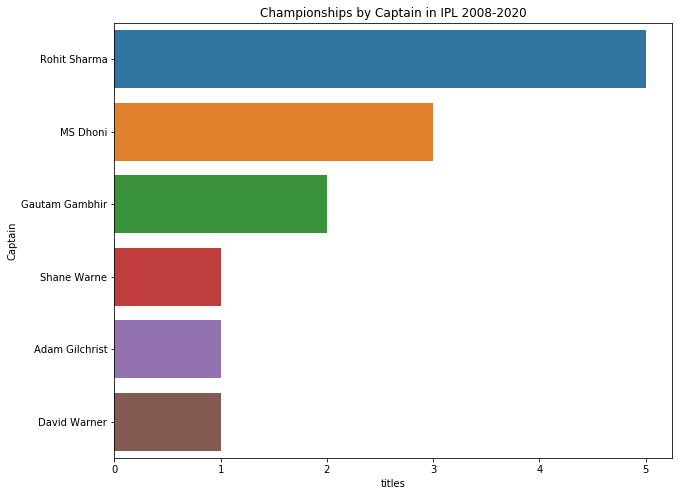

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(y=win_count['Captain'],x=win_count['winner'],orient='h')
plt.xlabel('titles')
plt.ylabel('Captain')
plt.title('Championships by Captain in IPL 2008-2020')
plt.show()


Rohit Sharma is the most successful captain in IPL 2008-2020, followed by MS Dhoni and Gautam Gambhir with 2 and 3 titles respectively.Australian Maestros Shane Warner,Adam Gilchrist and David Warner won the trophy once.